<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Telecom X - Análise de Evasão de Clientes



Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

O que você vai praticar:

✅ Importar e manipular dados de uma API de forma eficiente.

✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.

✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.

✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.



## Arquitetura Medalhão

Nessa análise utilizaremos a Arquitetura Medalhão, para uma melhor organização e qualidade dos dados.
Serão utilizadas 3 camadas, Bronze, Prata e Ouro, para mantermos a rastreabilidade durante o tratamento dos dados.

- Camada Bronze:
  Esta camada armazena cópias dos dados brutos, como foram recebidos da fonte. É um ponto de partida para a jornada dos dados, onde eles são armazenados sem modificações significativas.
- Camada Prata:
  Na camada Prata, os dados são limpos, transformados e enriquecidos, removendo dados redundantes ou inválidos. Inclui a validação de dados, desduplicação e agregação de informações.
- Camada Ouro:
  A camada Ouro representa o nível mais alto de refinamento, onde os dados são transformados em formatos otimizados para análises e tomada de decisões. Aqui, os dados são preparados para serem utilizados por ferramentas de análise de dados e relatórios.



## Preparação do ambiente:

In [1]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os

In [2]:
#Criar a estrutura de diretórios para a armazenar os dados
!mkdir -p data
!mkdir -p data/bronze
!mkdir -p data/prata
!mkdir -p data/ouro

#📌 Extracão - Camada Bronze

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'


In [4]:
dados = pd.read_json(url)
dados.to_json('data/bronze/TelecomX_Data.json')
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## Normalização dos dados JSON

In [5]:
# Lista de colunas JSON
json_columns = ['customer','phone','internet', 'account']

# Normalizar todas as colunas JSON e concatenar
normalized_dfs = [pd.json_normalize(dados[col]) for col in json_columns]
df_bronze = pd.concat([dados[['id']] if 'id' in dados.columns else dados.drop(columns=json_columns), *normalized_dfs], axis=1)

df_bronze

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
#Salvar os dados normalizados na camada bronze
df_bronze.to_parquet('data/bronze/TelecomX_Data.parquet')

#🔧 Transformação - Camada Prata

## Exploração inicial dos dados

In [7]:
df_prata = df_bronze.copy()

### Dicionário de dados

  

    customerID: número de identificação único de cada cliente
    Churn: se o cliente deixou ou não a empresa
    gender: gênero (masculino e feminino)
    SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    Partner: se o cliente possui ou não um parceiro ou parceira
    Dependents: se o cliente possui ou não dependentes
    tenure: meses de contrato do cliente
    PhoneService: assinatura de serviço telefônico
    MultipleLines: assisnatura de mais de uma linha de telefone
    InternetService: assinatura de um provedor internet
    OnlineSecurity: assinatura adicional de segurança online
    OnlineBackup: assinatura adicional de backup online
    DeviceProtection: assinatura adicional de proteção no dispositivo
    TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    StreamingTV: assinatura de TV a cabo
    StreamingMovies: assinatura de streaming de filmes
    Contract: tipo de contrato
    PaperlessBilling: se o cliente prefere receber online a fatura
    PaymentMethod: forma de pagamento
    Charges.Monthly: total de todos os serviços do cliente por mês
    Charges.Total: total gasto pelo cliente


In [8]:
df_prata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
df_prata.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [10]:
df_prata.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


### Passo 1 - Converter colunas númericas


In [11]:
try:
  df_prata['Charges.Total'] = df_prata['Charges.Total'].astype(np.float64)
except Exception as e:
  print('Erro ao converter coluna: ', e)

Erro ao converter coluna:  could not convert string to float: ' '


In [12]:
# Remover o espaço que está causando erro e tentar novamente
df_prata['Charges.Total'] = df_prata['Charges.Total'].replace(' ', np.nan)
try:
  df_prata['Charges.Total'] = df_prata['Charges.Total'].astype(np.float64)
except Exception as e:
  print('Erro ao converter coluna: ', e)

### Passo 2 - Converter colunas sim/não para integer

In [13]:
df_prata['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [14]:
df_prata.query('Churn == ""')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Como não temos informação de churn nesses registros e essa será uma coluna importante em nossa análise, vamos excluir estes da camada Prata antes de transformar a coluna em númerica (0=No e 1=Yes)


In [15]:
df_prata = df_prata.query('Churn != ""')
df_prata['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [16]:
df_prata['Churn'] = df_prata['Churn'].replace({'Yes': '1', 'No': '0'})
df_prata['Churn'] = df_prata['Churn'].astype(np.int64)

/tmp/ipython-input-16-2067394689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prata['Churn'] = df_prata['Churn'].replace({'Yes': '1', 'No': '0'})
/tmp/ipython-input-16-2067394689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prata['Churn'] = df_prata['Churn'].astype(np.int64)


### Verificando as demais colunas com valores Yes/No (ou similares que podem ser convertidos em 0 e 1)

In [17]:
colunas = df_prata.columns
colunas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [18]:
df_prata.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [19]:
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
# Verificar valores de cada coluna
for coluna in colunas_binarias:
  print('-> Coluna: ',coluna)
  print(df_prata[coluna].value_counts())
  print('---')


-> Coluna:  Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
---
-> Coluna:  Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
---
-> Coluna:  PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
---
-> Coluna:  MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
---
-> Coluna:  OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
---
-> Coluna:  OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
---
-> Coluna:  DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
---
-> Coluna:  TechSupport
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name:

Vou usar um Regex para identificar as colunas que começam com "No internet.. " ou "No Phone.." convertendo todas para 0


In [20]:
for coluna in colunas_binarias:
  df_prata.loc[:, coluna] = df_prata[coluna].str.replace('(?i)^no.*', '0',regex=True) # Regex começando com 'no' (case insensitive), e selecionando o restante do texto para subsituir por '0'
  df_prata.loc[:, coluna] = df_prata[coluna].str.replace('(?i)^yes.*', '1',regex=True)
  df_prata.loc[:, coluna] = df_prata[coluna].astype(np.int64)


### Passo 3 - Converter colunas categoricas

In [21]:
df_prata['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [22]:
df_prata['gender'] = df_prata['gender'].astype('category')

In [23]:
df_prata['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [24]:
df_prata['Contract'] = df_prata['Contract'].astype('category')

In [25]:
df_prata['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [26]:
df_prata['PaymentMethod'] = df_prata['PaymentMethod'].astype('category')

In [27]:
df_prata['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [28]:
df_prata['InternetService'] = df_prata['InternetService'].astype('category')

In [29]:
df_prata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   int64   
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int64   
 4   Partner           7043 non-null   object  
 5   Dependents        7043 non-null   object  
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   object  
 8   MultipleLines     7043 non-null   object  
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   object  
 11  OnlineBackup      7043 non-null   object  
 12  DeviceProtection  7043 non-null   object  
 13  TechSupport       7043 non-null   object  
 14  StreamingTV       7043 non-null   object  
 15  StreamingMovies   7043 non-null   object  
 16  Contract          7043 non-nu

In [30]:
df_prata.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85


In [31]:
df_prata.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.265370,0.162147,32.371149,64.761692,2283.300441
std,0.441561,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.500000,401.450000
50%,0.000000,0.000000,29.000000,70.350000,1397.475000
75%,1.000000,0.000000,55.000000,89.850000,3794.737500
max,1.000000,1.000000,72.000000,118.750000,8684.800000


### Limpar dados

Remover clientes com Tenure = 0 (meses de contrato)

In [32]:
df_prata.query('tenure == 0')['customerID'].count()

np.int64(11)

In [33]:
df_prata = df_prata.query('tenure > 0')

Verificar registros com Charges.Total = 0 (Gastos Totais)

### Criar coluna de Contas Diárias

In [34]:
df_prata.query('`Charges.Total` == 0')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [35]:
df_prata['Contas_Diarias'] = df_prata['Charges.Monthly'].apply(lambda x: x/30).astype(np.float64)

### Traduzir e renomear colunas de dados



Novo Dicionário de dados

- ID_Cliente (customerID): número de identificação único de cada cliente
- Churn (Churn): se o cliente deixou ou não a empresa
- Genero (gender): gênero (masculino e feminino)
- Idoso (SeniorCitizen): informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Casal (Partner): se o cliente possui ou não um parceiro ou parceira
- Dependentes (Dependents): se o cliente possui ou não dependentes
- Tempo_Contrato (tenure): meses de contrato do cliente
- Servico_Telefone (PhoneService): assinatura de serviço telefônico
- Servico_MultiplasLinhas (MultipleLines): assinatura de mais de uma linha de telefone
- Servico_Internet (InternetService): assinatura de um provedor internet
- Opt_OnlineSecurity (OnlineSecurity): assinatura adicional de segurança online
- Opt_OnlineBackup (OnlineBackup): assinatura adicional de backup online
- Opt_DeviceProtection (DeviceProtection): assinatura adicional de proteção no dispositivo
- Opt_TechSupport (TechSupport): assinatura adicional de suporte técnico, menos tempo de espera
- Opt_StreamingTV (StreamingTV): assinatura de TV a cabo
- Opt_StreamingMovies (StreamingMovies): assinatura de streaming de filmes
- Tipo_Contrato (Contract): tipo de contrato
- FaturaOnline (PaperlessBilling): se o cliente prefere receber online a fatura
- Forma_Pagto (PaymentMethod): forma de pagamento
- Conta_Mensal (Charges.Monthly): total de todos os serviços do cliente por mês
- Conta_Diarias (N/A): total de todos os serviços do cliente por mês
- Conta_Total (Charges.Total): total gasto pelo cliente


In [36]:
colunas_originais = df_prata.columns
colunas_originais

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Contas_Diarias'],
      dtype='object')

In [37]:
colunas_traduzidas = ['ID_Cliente', 'Churn', 'Genero', 'Idoso', 'Casal', 'Dependentes', 'Tempo_Contrato', 'Servico_Telefone', 'Servico_MultiplasLinhas', 'Servico_Internet', 'Opt_OnlineSecurity',
                      'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'Tipo_Contrato', 'FaturaOnline',
                      'Forma_Pagto', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']
df_prata.columns = colunas_traduzidas
# Transformar para o POrtuguês:
df_prata['Genero'] = df_prata['Genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
df_prata.head(3)

/tmp/ipython-input-37-2468460192.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_prata['Genero'] = df_prata['Genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})


,ID_Cliente,Churn,Genero,Idoso,Casal,Dependentes,Tempo_Contrato,Servico_Telefone,Servico_MultiplasLinhas,Servico_Internet,...,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,Tipo_Contrato,FaturaOnline,Forma_Pagto,Conta_Mensal,Conta_Total,Conta_Diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


In [38]:
#Salvando a camada Prata como arquivo Parquet para analise futura
df_prata.to_parquet('data/prata/TelecomX_Data.parquet')

#📊 Carga e análise - Camada Ouro

In [39]:
#Iniciando com o arquivo Parquet salvo na camada prata:
df_ouro = pd.read_parquet('data/prata/TelecomX_Data.parquet')


## Análise Descritiva

In [40]:
df_ouro.describe()

,Churn,Idoso,Casal,Dependentes,Tempo_Contrato,Servico_Telefone,Servico_MultiplasLinhas,Opt_OnlineSecurity,Opt_OnlineBackup,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,FaturaOnline,Conta_Mensal,Conta_Total,Conta_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Uma análise descritiva mais detalhada será realizada no BD Star Schema, que será criado a seguir

In [41]:
#Analise Descritiva resumida:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -           Cancelados : {df_ouro.query("Churn == 1").ID_Cliente.count()}')
print(f'   -       Não Cancelados : {df_ouro.query("Churn == 0").ID_Cliente.count()}')
print(f'   -   Média cancelamento : {df_ouro.query("Churn == 1").ID_Cliente.count()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tempo de Contrato:')
print(f'   -               Máximo : {df_ouro.Tempo_Contrato.max()} meses')
print(f'   -               Mínimo : {df_ouro.Tempo_Contrato.min()} meses')
print(f'   -                Médio : {df_ouro.Tempo_Contrato.mean():.2f} meses')
print(f'   -        Desvio padrão : {df_ouro.Tempo_Contrato.std():.2f} meses')
print(f'   -              Mediana : {df_ouro.Tempo_Contrato.median():.2f} meses')
print()
print(f'Conta Mensal:')
print(f'   -               Máximo : R${df_ouro.Conta_Mensal.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Mensal.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Mensal.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Mensal.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Mensal.median():.2f}')
print()
print(f'Conta Total:')
print(f'   -               Máximo : R${df_ouro.Conta_Total.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Total.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Total.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Total.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Total.median():.2f}')

Clientes                  : 7032
   -           Cancelados : 1869
   -       Não Cancelados : 5163
   -   Média cancelamento : 26.58% 

Tempo de Contrato:
   -               Máximo : 72 meses
   -               Mínimo : 1 meses
   -                Médio : 32.42 meses
   -        Desvio padrão : 24.55 meses
   -              Mediana : 29.00 meses

Conta Mensal:
   -               Máximo : R$118.75
   -               Mínimo : R$18.25
   -                Médio : R$64.80
   -        Desvio padrão : R$30.09
   -              Mediana : R$70.35

Conta Total:
   -               Máximo : R$8684.80
   -               Mínimo : R$18.80
   -                Médio : R$2283.30
   -        Desvio padrão : R$2266.77
   -              Mediana : R$1397.47


In [42]:
#Analise Descritiva Perfil Clientes e Serviços:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -               Idosos : {df_ouro.Idoso.sum()} = {df_ouro.Idoso.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -               Casais : {df_ouro.Casal.sum()} = {df_ouro.Casal.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -      Com dependentes : {df_ouro.Dependentes.sum()} = {df_ouro.Dependentes.sum()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Serviços do Contrato:')
print(f'   -             Telefone : {df_ouro.Servico_Telefone.sum()} = {df_ouro.Servico_Telefone.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -     Multiplas Linhas : {df_ouro.Servico_MultiplasLinhas.sum()} = {df_ouro.Servico_MultiplasLinhas.sum()/df_ouro.ID_Cliente.count():.2%} ')
Internet_fo = df_ouro.query("Servico_Internet == 'Fiber optic'").ID_Cliente.count()
Internet_DSL = df_ouro.query("Servico_Internet == 'DSL'").ID_Cliente.count()
Internet_No = df_ouro.query("Servico_Internet == 'No'").ID_Cliente.count()
print(f'   -       Internet Fibra : {Internet_fo} = {Internet_fo/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Internet DSL : {Internet_DSL} = {Internet_DSL/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Sem Internet : {Internet_No} = {Internet_No/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Opcionais do Contrato:')
print(f'   -      Online Security : {df_ouro.Opt_OnlineSecurity.sum()} = {df_ouro.Opt_OnlineSecurity.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -    Device Protection : {df_ouro.Opt_DeviceProtection.sum()} = {df_ouro.Opt_DeviceProtection.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Tech Support : {df_ouro.Opt_TechSupport.sum()} = {df_ouro.Opt_TechSupport.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Streaming TV : {df_ouro.Opt_StreamingTV.sum()} = {df_ouro.Opt_StreamingTV.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -     Streaming Movies : {df_ouro.Opt_StreamingMovies.sum()} = {df_ouro.Opt_StreamingMovies.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -        Fatura Online : {df_ouro.Opt_TechSupport.sum()} = {df_ouro.FaturaOnline.sum()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tipo do Contrato:')
Tipo_m = df_ouro.query("Tipo_Contrato == 'Month-to-month'").ID_Cliente.count()
print(f'   -              Mensal : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
Tipo_m = df_ouro.query("Tipo_Contrato == 'One year'").ID_Cliente.count()
print(f'   -               Anual : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
Tipo_m = df_ouro.query("Tipo_Contrato == 'Two year'").ID_Cliente.count()
print(f'   -            Bi-Anual : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Forma de Pagamento:')
pgto = df_ouro.query("Forma_Pagto == 'Electronic check'").ID_Cliente.count()
print(f'   -     Electronic check : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Mailed check'").ID_Cliente.count()
print(f'   -         Mailed check : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Bank transfer (automatic)'").ID_Cliente.count()
print(f'   - Bank transfer (auto) : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Credit card (automatic)'").ID_Cliente.count()
print(f'   -   Credit card (auto) : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')

Clientes                  : 7032
   -               Idosos : 1142 = 16.24% 
   -               Casais : 3393 = 48.25% 
   -      Com dependentes : 2099 = 29.85% 

Serviços do Contrato:
   -             Telefone : 6352 = 90.33% 
   -     Multiplas Linhas : 2967 = 42.19% 
   -       Internet Fibra : 3096 = 44.03% 
   -         Internet DSL : 2416 = 34.36% 
   -         Sem Internet : 1520 = 21.62% 

Opcionais do Contrato:
   -      Online Security : 2015 = 28.65% 
   -    Device Protection : 2418 = 34.39% 
   -         Tech Support : 2040 = 29.01% 
   -         Streaming TV : 2703 = 38.44% 
   -     Streaming Movies : 2731 = 38.84% 
   -        Fatura Online : 2040 = 59.27% 

Tipo do Contrato:
   -              Mensal : 3875 = 55.11% 
   -               Anual : 1472 = 20.93% 
   -            Bi-Anual : 1685 = 23.96% 

Forma de Pagamento:
   -     Electronic check : 2365 = 33.63% 
   -         Mailed check : 1604 = 22.81% 
   - Bank transfer (auto) : 1542 = 21.93% 
   -   Credit card (aut

## Criação de Base de Dados Star Schema

Vamos carregar os dados em uma camada Ouro e criar uma Base de dados para armazenar os dados em um esquema estrela

### Usando DuckDB para armazenar DW na camada Ouro

In [43]:
#import sqlalchemy
#from sqlalchemy import create_engine, MetaData, Table, text
#engine = create_engine('sqlite:///:memory:')

# Atualizado para usar DuckDB
import duckdb
db = duckdb.connect(database='/content/data/ouro/telecomx.duckdb')

### Criando as tabelas no BD

**Dimensão Clientes:**

- Tabela: dim_clientes:
  - ID_Cliente
  - Genero
  - Idoso
  - Casal
  - Dependentes

In [44]:
colunas_cliente = ['ID_Cliente', 'Genero', 'Idoso', 'Casal', 'Dependentes']
df_clientes = df_ouro[colunas_cliente].copy()

df_clientes[colunas_cliente[2:]] = df_clientes[colunas_cliente[2:]].astype(bool)
# Removido uso do SQLAlchemy para usar DuckDB
#df_clientes.to_sql('dim_clientes', engine, index=True)
db.execute("""
DROP TABLE IF EXISTS dim_clientes
""")
db.execute("""
CREATE TABLE IF NOT EXISTS dim_clientes AS
SELECT * FROM df_clientes
""")


df_clientes.to_parquet('data/ouro/dim_clientes.parquet')

In [45]:
db.sql("SELECT * FROM dim_clientes LIMIT 5")

┌────────────┬───────────────────────────────┬─────────┬─────────┬─────────────┐
│ ID_Cliente │            Genero             │  Idoso  │  Casal  │ Dependentes │
│  varchar   │ enum('feminino', 'masculino') │ boolean │ boolean │   boolean   │
├────────────┼───────────────────────────────┼─────────┼─────────┼─────────────┤
│ 0002-ORFBO │ Feminino                      │ false   │ true    │ true        │
│ 0003-MKNFE │ Masculino                     │ false   │ false   │ false       │
│ 0004-TLHLJ │ Masculino                     │ false   │ false   │ false       │
│ 0011-IGKFF │ Masculino                     │ true    │ true    │ false       │
│ 0013-EXCHZ │ Feminino                      │ true    │ true    │ false       │
└────────────┴───────────────────────────────┴─────────┴─────────┴─────────────┘

In [46]:
df_teste = db.sql("SELECT * FROM dim_clientes LIMIT 5").df()
df_teste

,ID_Cliente,Genero,Idoso,Casal,Dependentes
0,0002-ORFBO,Feminino,False,True,True
1,0003-MKNFE,Masculino,False,False,False
2,0004-TLHLJ,Masculino,False,False,False
3,0011-IGKFF,Masculino,True,True,False
4,0013-EXCHZ,Feminino,True,True,False


In [47]:
# Lendo um dataframe Pandas com Duckdb
result = db.sql('SELECT * FROM df_teste').fetchall()
result

[('0002-ORFBO', 'Feminino', False, True, True),
 ('0003-MKNFE', 'Masculino', False, False, False),
 ('0004-TLHLJ', 'Masculino', False, False, False),
 ('0011-IGKFF', 'Masculino', True, True, False),
 ('0013-EXCHZ', 'Feminino', True, True, False)]

**Dimensão Serviços:**

-Tabela: dim_tipos_servicos

        - ID_Servicos
        - Servico_Telefone
        - Servico_MultiplasLinhas
        - Servico_Internet
        - Opt_OnlineSecurity
        - Opt_OnlineBackup
        - Opt_DeviceProtection
        - Opt_TechSupport
        - Opt_StreamingTV
        - Opt_StreamingMovies

**Fato Servicos:**

-Tabela: fato_servicos_clientes

        - ID_Cliente
        - ID_Servicos


Concatenar as colunas de serviços para analisar as dimensões de serviços e permitir estudar futuros pacotes de serviços

In [48]:
colunas_servicos = ['Servico_Internet','Servico_Telefone', 'Servico_MultiplasLinhas',  'Opt_OnlineSecurity',
                      'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies']
#df_ouro['temp_tipo_servico'] = df_ouro[colunas_servicos].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
#df_ouro['temp_tipo_servico'].value_counts()

In [49]:
df_combinacoes = df_ouro[colunas_servicos].drop_duplicates().reset_index(drop=True)
df_combinacoes[colunas_servicos[1:]] = df_combinacoes[colunas_servicos[1:]].astype(bool)
df_combinacoes = pd.get_dummies(df_combinacoes, columns=['Servico_Internet'], prefix=['Internet'])

df_combinacoes['temp_tipo_servico'] = df_combinacoes.apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
df_combinacoes['ID_Servicos'] = df_combinacoes.index
df_combinacoes.columns = df_combinacoes.columns.str.replace(' ', '_')
df_combinacoes.set_index('ID_Servicos', inplace=True)
df_combinacoes.head()

,Servico_Telefone,Servico_MultiplasLinhas,Opt_OnlineSecurity,Opt_OnlineBackup,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,Internet_DSL,Internet_Fiber_optic,Internet_No,temp_tipo_servico
ID_Servicos,,,,,,,,,,,,
0,True,False,False,True,False,True,True,False,True,False,False,True-False-False-True-False-True-True-False-Tr...
1,True,True,False,False,False,False,False,True,True,False,False,True-True-False-False-False-False-False-True-T...
2,True,False,False,False,True,False,False,False,False,True,False,True-False-False-False-True-False-False-False-...
3,True,False,False,True,True,False,True,True,False,True,False,True-False-False-True-True-False-True-True-Fal...
4,True,False,False,False,False,True,True,False,False,True,False,True-False-False-False-False-True-True-False-F...


In [50]:
df_servicos = df_ouro[['ID_Cliente']+colunas_servicos ].copy()
df_servicos[colunas_servicos[1:]] = df_servicos[colunas_servicos[1:]].astype(bool)
#Pivotar a coluna  Servico_Internet
df_servicos = pd.get_dummies(df_servicos, columns=['Servico_Internet'], prefix=['Internet'])
df_servicos.columns = df_servicos.columns.str.replace(' ', '_')
df_servicos.head()

,ID_Cliente,Servico_Telefone,Servico_MultiplasLinhas,Opt_OnlineSecurity,Opt_OnlineBackup,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,Internet_DSL,Internet_Fiber_optic,Internet_No
0,0002-ORFBO,True,False,False,True,False,True,True,False,True,False,False
1,0003-MKNFE,True,True,False,False,False,False,False,True,True,False,False
2,0004-TLHLJ,True,False,False,False,True,False,False,False,False,True,False
3,0011-IGKFF,True,False,False,True,True,False,True,True,False,True,False
4,0013-EXCHZ,True,False,False,False,False,True,True,False,False,True,False


In [51]:
# Atualiza a lista de colunas, retirando a última (temp_tipo_servico)
colunas_servicos = df_combinacoes.columns[:-1]
print(colunas_servicos)

Index(['Servico_Telefone', 'Servico_MultiplasLinhas', 'Opt_OnlineSecurity',
       'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport',
       'Opt_StreamingTV', 'Opt_StreamingMovies', 'Internet_DSL',
       'Internet_Fiber_optic', 'Internet_No'],
      dtype='object')


In [52]:
# Relaciona os clientes com os tipos de serviços contratados (df_combinacoes)
df_servicos['temp_tipo_servico'] = df_servicos[colunas_servicos].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
df_servicos.drop(columns=colunas_servicos, inplace=True)
df_servicos = df_servicos.merge(df_combinacoes[['temp_tipo_servico']].assign(ID_servicos=df_combinacoes.index), on='temp_tipo_servico', how='left')
df_servicos.set_index('ID_Cliente', inplace=True)
df_servicos.drop(columns='temp_tipo_servico', inplace=True)
df_combinacoes.drop(columns='temp_tipo_servico', inplace=True)
df_combinacoes.reset_index(inplace=True)
df_servicos.reset_index(inplace=True)
df_servicos.head()

,ID_Cliente,ID_servicos
0,0002-ORFBO,0
1,0003-MKNFE,1
2,0004-TLHLJ,2
3,0011-IGKFF,3
4,0013-EXCHZ,4


In [53]:
df_servicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_Cliente   7032 non-null   object
 1   ID_servicos  7032 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 110.0+ KB


**Dimensão Tipos de Serviços:**

- Tabela: dim_tipos_servicos
 - ID_Servicos
 - ID_Servicos
 - Servico_Telefone
 - Servico_MultiplasLinhas
 - Opt_OnlineSecurity
 - Opt_OnlineBackup
 - Opt_DeviceProtection
 - Opt_TechSupport
 - Opt_StreamingTV
 - Opt_StreamingMovies
 - Internet_DSL
 - Internet_Fiber_optic
 - Internet_No

**Fato Serviços x Clientes:**

- Tabela: fato_servicos_clientes
 - ID_Cliente
 - ID_Servicos


In [75]:
#df_combinacoes.to_sql('dim_tipos_servicos', engine, index=True)
df_combinacoes.to_parquet('data/ouro/dim_tipos_servicos.parquet')
#df_servicos.to_sql('fato_servicos_clientes', engine, index=True)
df_servicos.to_parquet('data/ouro/fato_servicos_clientes.parquet')
db.execute("""
DROP TABLE IF EXISTS dim_tipos_servicos
""")
db.execute("""
DROP TABLE IF EXISTS fato_servicos_clientes
""")
db.execute("""
CREATE TABLE IF NOT EXISTS dim_tipos_servicos AS
SELECT * FROM df_combinacoes
""")
db.execute("""
CREATE TABLE IF NOT EXISTS fato_servicos_clientes AS
SELECT * FROM df_servicos
""")


In [55]:
# Remover tabelas caso seja necessário recriar do zero (Alterar o if = não será executado por padrão)
if 1 != 1:
  db.execute('DROP TABLE dim_tipos_servicos')
  db.execute('DROP TABLE fato_servicos_clientes')

In [56]:
db.sql('select * from fato_servicos_clientes')

┌────────────┬─────────────┐
│ ID_Cliente │ ID_servicos │
│  varchar   │    int64    │
├────────────┼─────────────┤
│ 0002-ORFBO │           0 │
│ 0003-MKNFE │           1 │
│ 0004-TLHLJ │           2 │
│ 0011-IGKFF │           3 │
│ 0013-EXCHZ │           4 │
│ 0013-MHZWF │           5 │
│ 0013-SMEOE │           6 │
│ 0014-BMAQU │           7 │
│ 0015-UOCOJ │           8 │
│ 0016-QLJIS │           9 │
│     ·      │           · │
│     ·      │           · │
│     ·      │           · │
│ 9975-SKRNR │          23 │
│ 9978-HYCIN │         130 │
│ 9979-RGMZT │          40 │
│ 9985-MWVIX │          12 │
│ 9986-BONCE │          23 │
│ 9987-LUTYD │          63 │
│ 9992-RRAMN │          68 │
│ 9992-UJOEL │          33 │
│ 9993-LHIEB │         175 │
│ 9995-HOTOH │          96 │
├────────────┴─────────────┤
│   7032 rows (20 shown)   │
└──────────────────────────┘

In [57]:
db.sql('select * from dim_tipos_servicos')

┌─────────────┬──────────────────┬─────────────────────────┬────────────────────┬──────────────────┬──────────────────────┬─────────────────┬─────────────────┬─────────────────────┬──────────────┬──────────────────────┬─────────────┐
│ ID_Servicos │ Servico_Telefone │ Servico_MultiplasLinhas │ Opt_OnlineSecurity │ Opt_OnlineBackup │ Opt_DeviceProtection │ Opt_TechSupport │ Opt_StreamingTV │ Opt_StreamingMovies │ Internet_DSL │ Internet_Fiber optic │ Internet_No │
│    int64    │     boolean      │         boolean         │      boolean       │     boolean      │       boolean        │     boolean     │     boolean     │       boolean       │   boolean    │       boolean        │   boolean   │
├─────────────┼──────────────────┼─────────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼──────────────┼──────────────────────┼─────────────┤
│           0 │ true             │ false                   │ fal

**Dimensão Contratos:**

- Tabela: dim_contratos
 - ID_Cliente
 - Churn
 - Tempo_Contrato
 - Tipo_Contrato
 - FaturaOnline
 - Forma_Pagto

**Fato Gastos:**

- Tabela: fato_gastos
 - ID_Cliente
 - Conta_Mensal
 - Conta_Total
 - Conta_Diarias

In [58]:
colunas_contratos = ['ID_Cliente', 'Churn', 'Tempo_Contrato', 'Tipo_Contrato','FaturaOnline',
                      'Forma_Pagto']
df_contratos = df_ouro[colunas_contratos].copy()
#df_contratos.to_sql('dim_contratos', engine, index=True)
df_contratos.to_parquet('data/ouro/dim_contratos.parquet')

colunas_gastos = ['ID_Cliente', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']
df_gastos = df_ouro[colunas_gastos].copy()
#df_gastos.to_sql('fato_gastos', engine, index=True)
df_gastos.to_parquet('data/ouro/fato_gastos.parquet')


In [59]:
# Remover tabelas caso seja necessário recriar do zero (Alterar o if = não será executado por padrão)
if 1 != 1:
  db.execute('DROP TABLE dim_contratos')
  db.execute('DROP TABLE fato_gastos')

In [60]:
#df_contratos.reset_index(inplace=True)
#df_gastos.reset_index(inplace=True)

db.execute("""
CREATE TABLE IF NOT EXISTS dim_contratos AS
SELECT * FROM df_contratos
""")
db.execute("""
CREATE TABLE IF NOT EXISTS fato_gastos AS
SELECT * FROM df_gastos
""")

In [61]:
db.sql('select * from dim_contratos')

┌────────────┬───────┬────────────────┬────────────────────────────────────────────────┬──────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ ID_Cliente │ Churn │ Tempo_Contrato │                 Tipo_Contrato                  │ FaturaOnline │                                           Forma_Pagto                                            │
│  varchar   │ int64 │     int64      │ enum('month-to-month', 'one year', 'two year') │    int64     │ enum('bank transfer (automatic)', 'credit card (automatic)', 'electronic check', 'mailed check') │
├────────────┼───────┼────────────────┼────────────────────────────────────────────────┼──────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 0002-ORFBO │     0 │              9 │ One year                                       │            1 │ Mailed check                                                                        

In [62]:
db.sql('select * from fato_gastos')

┌────────────┬──────────────┬─────────────┬────────────────────┐
│ ID_Cliente │ Conta_Mensal │ Conta_Total │   Conta_Diarias    │
│  varchar   │    double    │   double    │       double       │
├────────────┼──────────────┼─────────────┼────────────────────┤
│ 0002-ORFBO │         65.6 │       593.3 │ 2.1866666666666665 │
│ 0003-MKNFE │         59.9 │       542.4 │ 1.9966666666666666 │
│ 0004-TLHLJ │         73.9 │      280.85 │ 2.4633333333333334 │
│ 0011-IGKFF │         98.0 │     1237.85 │ 3.2666666666666666 │
│ 0013-EXCHZ │         83.9 │       267.4 │  2.796666666666667 │
│ 0013-MHZWF │         69.4 │      571.45 │ 2.3133333333333335 │
│ 0013-SMEOE │        109.7 │     7904.25 │ 3.6566666666666667 │
│ 0014-BMAQU │        84.65 │      5377.8 │ 2.8216666666666668 │
│ 0015-UOCOJ │         48.2 │      340.35 │ 1.6066666666666667 │
│ 0016-QLJIS │        90.45 │      5957.9 │              3.015 │
│     ·      │           ·  │          ·  │                 ·  │
│     ·      │           

## Analise dos dados


### Análise de Perfil dos clientes

In [63]:
query = """
  SELECT Genero, CASE WHEN Idoso THEN 'Idoso' ELSE 'Não Idoso' END as Idoso,
  CASE WHEN Casal THEN 'Casal' ELSE 'Solteiro' END as Casal,
  CASE WHEN Dependentes THEN 'Com Dependentes' ELSE 'Sem Dependentes' END as Dependentes,
  count(c.ID_Cliente) as Qde_Clientes,
  count(c.ID_Cliente)/(SELECT count(ID_Cliente) from dim_clientes)*100 as Perc_Clientes
  FROM dim_clientes as c
  GROUP BY ALL
  ORDER by Qde_Clientes DESC
"""


ouro_perfil_Cliente = db.sql(query).df()
ouro_perfil_Cliente.to_parquet('data/ouro/DW_Perfil_Cliente.parquet')
ouro_perfil_Cliente

,Genero,Idoso,Casal,Dependentes,Qde_Clientes,Perc_Clientes
0,Masculino,Não Idoso,Solteiro,Sem Dependentes,1381,19.638794
1,Feminino,Não Idoso,Solteiro,Sem Dependentes,1338,19.027304
2,Feminino,Não Idoso,Casal,Com Dependentes,839,11.931172
3,Masculino,Não Idoso,Casal,Com Dependentes,818,11.632537
4,Feminino,Não Idoso,Casal,Sem Dependentes,596,8.475540
5,Masculino,Não Idoso,Casal,Sem Dependentes,567,8.063140
6,Feminino,Idoso,Solteiro,Sem Dependentes,317,4.507964
7,Masculino,Idoso,Casal,Sem Dependentes,281,3.996018
8,Masculino,Idoso,Solteiro,Sem Dependentes,244,3.469852
9,Feminino,Idoso,Casal,Sem Dependentes,209,2.972127


In [64]:
df_perfil = ouro_perfil_Cliente.copy()
df_perfil['Perfil'] = df_perfil['Genero'].astype(str) + ' - ' + df_perfil['Idoso'].astype(str) + ' - ' + df_perfil['Casal'].astype(str) + ' - ' + df_perfil['Dependentes'].astype(str)
df_perfil.drop(columns=['Genero', 'Idoso', 'Casal', 'Dependentes'], inplace=True)
df_perfil.head()


,Qde_Clientes,Perc_Clientes,Perfil
0,1381,19.638794,Masculino - Não Idoso - Solteiro - Sem Depende...
1,1338,19.027304,Feminino - Não Idoso - Solteiro - Sem Dependentes
2,839,11.931172,Feminino - Não Idoso - Casal - Com Dependentes
3,818,11.632537,Masculino - Não Idoso - Casal - Com Dependentes
4,596,8.475540,Feminino - Não Idoso - Casal - Sem Dependentes


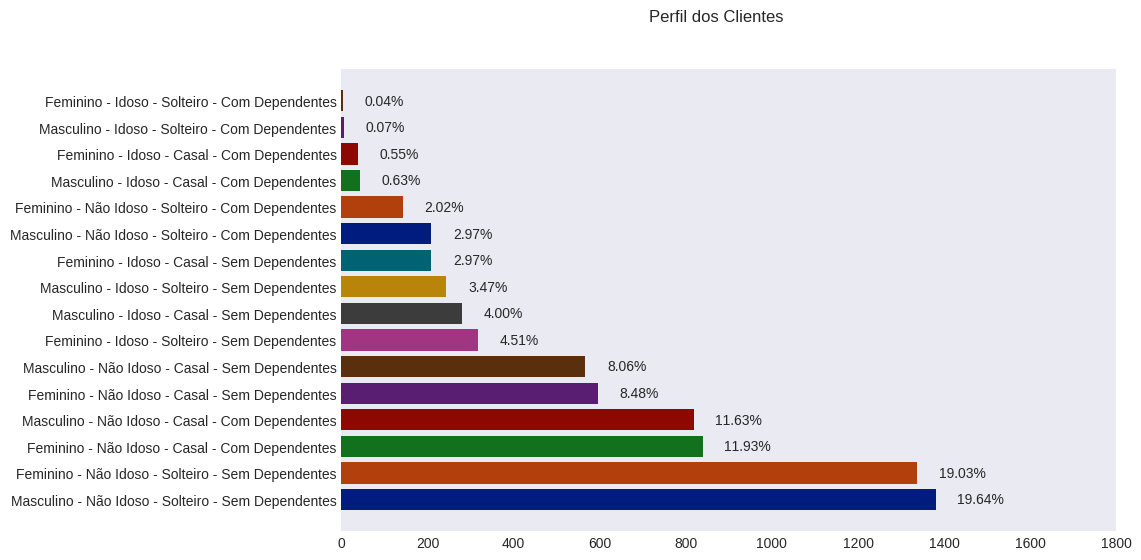

In [65]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 1800
  cores = sns.color_palette("dark")
  fig, ax = plt.subplots(figsize=(10,6))
  fig.suptitle('Perfil dos Clientes')
  bars = ax.barh(df_perfil['Perfil'], df_perfil['Qde_Clientes'], color=cores)

  for i, bar in enumerate(bars):
      width = bar.get_width()
      percentage = df_perfil['Perc_Clientes'].iloc[i]
      ax.text(width + 50, bar.get_y() + bar.get_height() / 2,
              f'{percentage:.2f}%', ha='left', va='center', fontsize=10)

  ax.set_xlim(0, max_y)
  plt.show()

In [66]:
col_valores = ['Qde_Clientes','Perc_Clientes']
df_genero = ouro_perfil_Cliente.groupby('Genero')[col_valores].sum().reset_index()
df_idoso = ouro_perfil_Cliente.groupby('Idoso')[col_valores].sum().reset_index()
df_casado = ouro_perfil_Cliente.groupby('Casal')[col_valores].sum().reset_index()
df_dependente = ouro_perfil_Cliente.groupby('Dependentes')[col_valores].sum().reset_index()

/tmp/ipython-input-66-1644729493.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genero = ouro_perfil_Cliente.groupby('Genero')[col_valores].sum().reset_index()


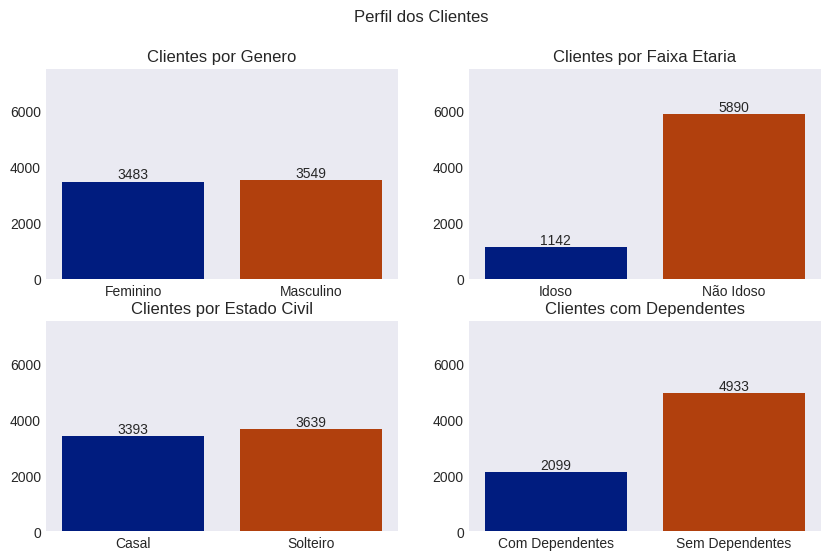

In [67]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 7500
  cores = sns.color_palette("dark")
  fig, axs = plt.subplots(2,2,figsize=(10,6))
  fig.suptitle('Perfil dos Clientes')
  bars = axs[0,0].bar(df_genero['Genero'], df_genero['Qde_Clientes'], label='Genero', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,0].set_title('Clientes por Genero')
  axs[0,0].set_ylim(0,max_y)
  bars = axs[0,1].bar(df_idoso['Idoso'], df_idoso['Qde_Clientes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,1].set_title('Clientes por Faixa Etaria')
  axs[0,1].set_ylim(0,max_y)
  bars = axs[1,0].bar(df_casado['Casal'], df_casado['Qde_Clientes'], label='Casado', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,0].set_title('Clientes por Estado Civil')
  axs[1,0].set_ylim(0,max_y)
  bars = axs[1,1].bar(df_dependente['Dependentes'], df_dependente['Qde_Clientes'], label='Dependentes', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,1].set_title('Clientes com Dependentes')
  axs[1,1].set_ylim(0,max_y)
  plt.show()

### Análise de Gastos por atributos dos clientes






In [68]:
query = """
  SELECT Genero, CASE WHEN Idoso THEN 'Idoso' ELSE 'Não Idoso' END as Idoso,
  CASE WHEN Casal THEN 'Casal' ELSE 'Solteiro' END as Casal,
  CASE WHEN Dependentes THEN 'Com Dependentes' ELSE 'Sem Dependentes' END as Dependentes, count(c.ID_Cliente) as Qde_Clientes,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_clientes as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY ALL
  ORDER by Qde_Clientes DESC
"""


ouro_Gasto_Cliente = db.sql(query).df()
ouro_Gasto_Cliente.to_parquet('data/ouro/DW_Gasto_Cliente.parquet')
ouro_Gasto_Cliente.head()

,Genero,Idoso,Casal,Dependentes,Qde_Clientes,Gasto_Mensal,Gasto_Total,Gasto_Diarias,Media_Gasto_Dia,Media_Gasto_Mes,Media_Gasto_Total
0,Masculino,Não Idoso,Solteiro,Sem Dependentes,1381,81453.15,2055933.40,2715.105000,1.966043,58.981282,1488.728023
1,Feminino,Não Idoso,Solteiro,Sem Dependentes,1338,82016.35,2073697.30,2733.878333,2.043257,61.297720,1549.848505
2,Feminino,Não Idoso,Casal,Com Dependentes,839,49527.00,2205045.50,1650.900000,1.967700,59.030989,2628.182956
3,Masculino,Não Idoso,Casal,Com Dependentes,818,49851.00,2240010.55,1661.700000,2.031418,60.942543,2738.399205
4,Feminino,Não Idoso,Casal,Sem Dependentes,596,41697.30,1883625.50,1389.910000,2.332064,69.961913,3160.445470


In [69]:
ouro_Gasto_Cliente.Qde_Clientes.sum()

np.int64(7032)

In [70]:
col_medias = ['Media_Gasto_Mes', 'Media_Gasto_Dia', 'Gasto_Diarias']
df_genero = ouro_Gasto_Cliente.groupby('Genero')[col_medias].mean().reset_index()
df_idoso = ouro_Gasto_Cliente.groupby('Idoso')[col_medias].mean().reset_index()
df_casado = ouro_Gasto_Cliente.groupby('Casal')[col_medias].mean().reset_index()
df_dependente = ouro_Gasto_Cliente.groupby('Dependentes')[col_medias].mean().reset_index()

/tmp/ipython-input-70-1341747536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genero = ouro_Gasto_Cliente.groupby('Genero')[col_medias].mean().reset_index()


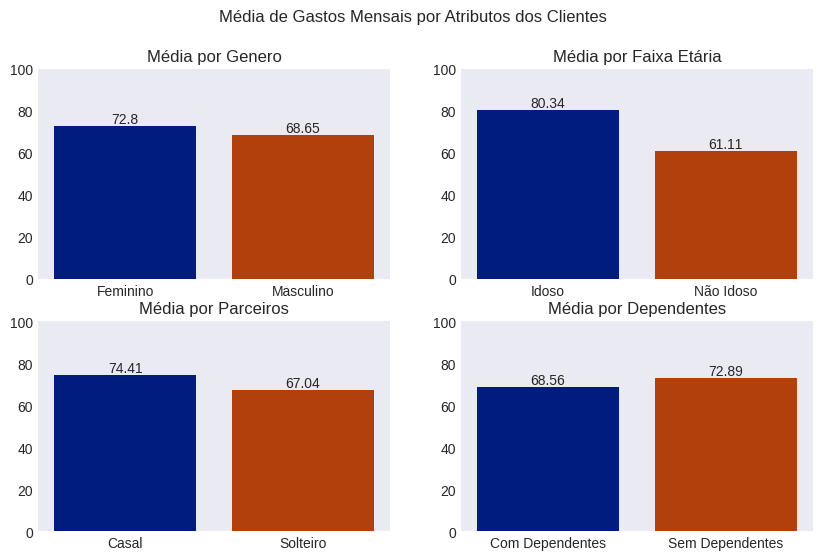

In [71]:
with plt.style.context('seaborn-v0_8-dark'):
  max_y = 100
  cores = sns.color_palette("dark")
  fig, axs = plt.subplots(2,2,figsize=(10,6))
  fig.suptitle('Média de Gastos Mensais por Atributos dos Clientes')
  bars = axs[0,0].bar(df_genero['Genero'], df_genero['Media_Gasto_Mes'], label='Genero', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,0].set_title('Média por Genero')
  axs[0,0].set_ylim(0,max_y)
  bars = axs[0,1].bar(df_idoso['Idoso'], df_idoso['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,1].set_title('Média por Faixa Etária')
  axs[0,1].set_ylim(0,max_y)
  bars = axs[1,0].bar(df_casado['Casal'], df_casado['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,0].set_title('Média por Parceiros')
  axs[1,0].set_ylim(0,max_y)
  bars = axs[1,1].bar(df_dependente['Dependentes'], df_dependente['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,1].set_title('Média por Dependentes')
  axs[1,1].set_ylim(0,max_y)
  plt.show()

### Analise do Perfil de Clientes por Servicos





In [72]:
# Função para plotar 4 gráficos comparativos
def graficos_atributos(df_array,col_valores, col_grupos, titulos_axes, legendas, tamanho_barra, titulo, max_y):
  with plt.style.context('seaborn-v0_8-dark'):
      cores = sns.color_palette("dark", n_colors=len(col_valores))
      fig, axs = plt.subplots(2,2,figsize=(10, 6))
      fig.suptitle(titulo)
      bar_width = tamanho_barra  # Largura de cada barra
      indices = range(2)
      col_num = 0
      for axi in range(2):
        for axj in range(2):
          ax = axs[axi,axj]
          df = df_array[col_num]
          for i, col in enumerate(col_valores):
              # Posicionar as barras com deslocamento
              bars = ax.bar([x + i * bar_width for x in indices], df[col],
                            width=bar_width, label=col, color=cores[i])
              # Adicionar valores acima das barras
              for bar in bars:
                  height = bar.get_height()
                  ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                          ha='center', va='bottom', fontsize=8)
          ax.set_xticks([x + bar_width * (len(col_valores) - 1) / 2 for x in indices])
          ax.set_xticklabels(df[col_grupos[col_num]])
          ax.set_title(titulos_axes[col_num])
          ax.set_ylabel(legendas[col_num])
          ax.set_xlabel(legendas[col_num+4])
          ax.set_ylim(0,max_y)
          #ax.legend(title='Serviços', bbox_to_anchor=(1.05, 1), loc='upper left')
          col_num += 1

      plt.legend(title=titulo, bbox_to_anchor=(1.05, 1), loc='upper left')

      plt.tight_layout(rect=[0, 0, 1, 0.95])
      plt.show()

In [86]:
query = """
  SELECT Genero, CASE WHEN Idoso THEN 'Idoso' ELSE 'Não Idoso' END as Idoso,
  CASE WHEN Casal THEN 'Casal' ELSE 'Solteiro' END as Casal,
  CASE WHEN Dependentes THEN 'Com Dependentes' ELSE 'Sem Dependentes' END as Dependentes,
  count(c.ID_Cliente) as Qde_Clientes,
  Servico_Telefone as Telefone , Servico_MultiplasLinhas as Multiplas_Linhas,
  Internet_DSL, Internet_Fiber_optic as Internet_Fibra, Internet_No,
  Opt_OnlineSecurity as OnlineSecurity, Opt_OnlineBackup as OnlineBackup, Opt_DeviceProtection as DeviceProtection,
  Opt_TechSupport as TechSupport, Opt_StreamingTV as StreamingTV, Opt_StreamingMovies as StreamingMovies
  FROM dim_clientes as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  INNER JOIN fato_servicos_clientes as s ON c.ID_Cliente = s.ID_Cliente
  INNER JOIN dim_tipos_servicos as ts ON s.ID_Servicos = ts.ID_Servicos
  GROUP BY ALL
  ORDER by Qde_Clientes DESC
"""

ouro_Clientes_Servicos = db.sql(query).df()
ouro_Clientes_Servicos.to_parquet('data/ouro/DW_Clientes_Servicos.parquet')
ouro_Clientes_Servicos.head()

,Genero,Idoso,Casal,Dependentes,Qde_Clientes,Telefone,Multiplas_Linhas,Internet_DSL,Internet_Fibra,Internet_No,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Masculino,Não Idoso,Solteiro,Sem Dependentes,303,True,False,False,False,True,False,False,False,False,False,False
1,Feminino,Não Idoso,Solteiro,Sem Dependentes,251,True,False,False,False,True,False,False,False,False,False,False
2,Feminino,Não Idoso,Casal,Com Dependentes,203,True,False,False,False,True,False,False,False,False,False,False
3,Masculino,Não Idoso,Casal,Com Dependentes,173,True,False,False,False,True,False,False,False,False,False,False
4,Feminino,Não Idoso,Casal,Sem Dependentes,73,True,False,False,False,True,False,False,False,False,False,False


In [ ]:
ouro_Clientes_Servicos.columns

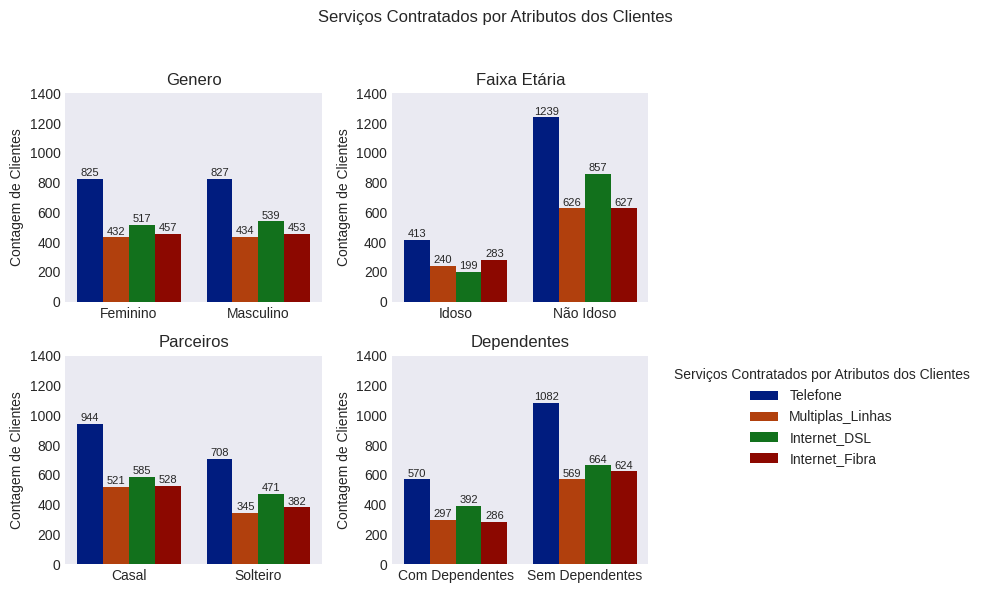

In [80]:
titulo = 'Serviços Contratados por Atributos dos Clientes'
col_servicos = ['Telefone', 'Multiplas_Linhas', 'Internet_DSL', 'Internet_Fibra']
col_grupos = ['Genero','Idoso','Casal','Dependentes']
titulos_ax = ['Genero','Faixa Etária','Parceiros','Dependentes']
legendas = ['Contagem de Clientes','Contagem de Clientes','Contagem de Clientes','Contagem de Clientes',
             '','','','']
tamanho_barras = 0.2
df_genero = ouro_Clientes_Servicos.groupby('Genero')[col_servicos].sum().reset_index()
df_idoso = ouro_Clientes_Servicos.groupby('Idoso')[col_servicos].sum().reset_index()
df_casado = ouro_Clientes_Servicos.groupby('Casal')[col_servicos].sum().reset_index()
df_dependente = ouro_Clientes_Servicos.groupby('Dependentes')[col_servicos].sum().reset_index()
graficos_atributos([df_genero,df_idoso,df_casado,df_dependente], col_servicos,col_grupos, titulos_ax, legendas, tamanho_barras, titulo, 1400)

/tmp/ipython-input-84-3998550057.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genero = ouro_Clientes_Servicos.groupby('Genero')[col_servicos].sum().reset_index()


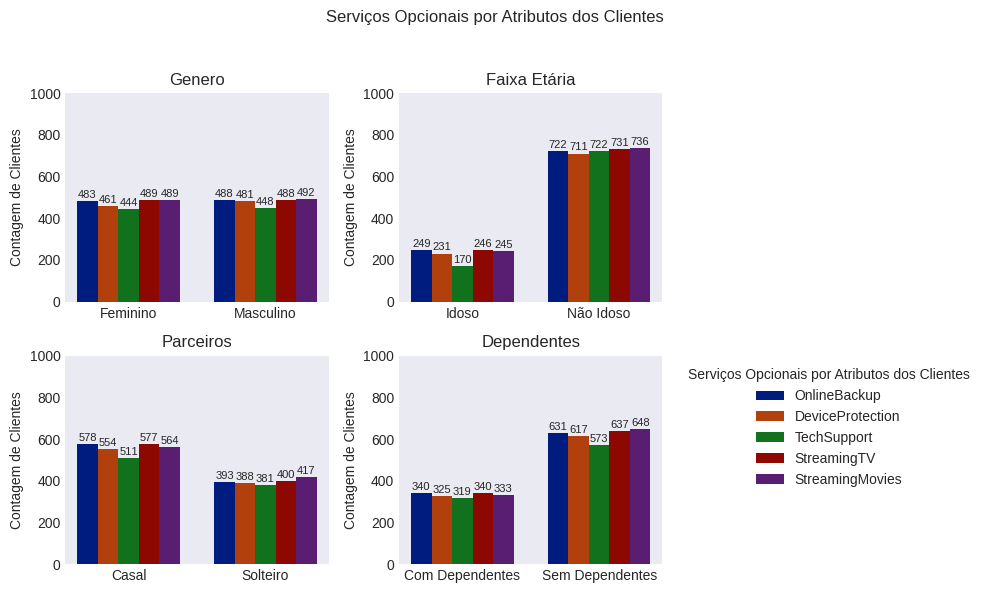

In [84]:
titulo = 'Serviços Opcionais por Atributos dos Clientes'
col_servicos = [ 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
col_grupos = ['Genero','Idoso','Casal','Dependentes']
titulos_ax = ['Genero','Faixa Etária','Parceiros','Dependentes']
legendas = ['Contagem de Clientes','Contagem de Clientes','Contagem de Clientes','Contagem de Clientes',
             '','','','']
tamanho_barras = 0.15

df_genero = ouro_Clientes_Servicos.groupby('Genero')[col_servicos].sum().reset_index()
df_idoso = ouro_Clientes_Servicos.groupby('Idoso')[col_servicos].sum().reset_index()
df_casado = ouro_Clientes_Servicos.groupby('Casal')[col_servicos].sum().reset_index()
df_dependente = ouro_Clientes_Servicos.groupby('Dependentes')[col_servicos].sum().reset_index()

graficos_atributos([df_genero,df_idoso,df_casado,df_dependente], col_servicos,col_grupos, titulos_ax, legendas, tamanho_barras, titulo, 1000)



### OCULTAR  - Função para plotar gráficos

In [96]:
# Função para plotar 4 gráficos comparativos
def graficos_atributos2(df_array, titulos_axes, legendas, titulo, max_y):
  with plt.style.context('seaborn-v0_8-dark'):

      fig, axs = plt.subplots(2,2,figsize=(10, 6))
      fig.suptitle(titulo)
      indices = range(2)
      graf_num = 0
      col_grupos = [[],[],[],[]]
      for axi in range(2):
        for axj in range(2):
          ax = axs[axi,axj]
          df = df_array[graf_num]
          col_vals = list(df.columns[1:])
          col_grupos[graf_num] = df.columns[0]
          bar_width = 0.4 / len(col_vals)  # Largura de cada barra
          cores = sns.color_palette("dark", n_colors=len(col_vals))
          for i, col in enumerate(col_vals):              # Posicionar as barras com deslocamento
              if len(col_vals) > 1:
                 cor = cores[i]
              else:
                 cor = sns.color_palette("Set2_r", n_colors=2)
              bars = ax.bar([x + i * bar_width for x in indices], df[col],
                            width=bar_width, label=col, color=cor)
              # Adicionar valores acima das barras
              for bar in bars:
                  height = bar.get_height()
                  ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                          ha='center', va='bottom', fontsize=8)
          ax.set_xticks([x + bar_width * (len(col_vals) - 1) / 2 for x in indices])
          ax.set_xticklabels(df[col_grupos[graf_num]])
          ax.set_title(titulos_axes[graf_num])
          ax.set_ylabel(legendas[graf_num])
          ax.set_xlabel(legendas[graf_num+4])
          ax.set_ylim(0,max_y[graf_num])
          if len(col_vals) > 1: # Só mostra a legenda se tiver mais de 2 valores
            ax.legend()#title=titulos_axes[graf_num])#, bbox_to_anchor=(1.05, 1), loc='upper left'
          graf_num += 1

      plt.tight_layout(rect=[0, 0, 1, 0.95])
      plt.show()

### Análise de Churn e Gastos por atributos dos contratos

In [89]:
query = """
  SELECT
  CASE WHEN Churn = 1 THEN 'Churn' WHEN Churn = 0 THEN 'Ativo' END as Evasao,
  count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio,
  -- sum(Churn) as Churn_Total,
  -- sum(Churn)*100.0/count(c.ID_Cliente) as Perc_Churn,
  -- Servico_Telefone, Servico_MultiplasLinhas, Servico_Internet,
  -- Opt_OnlineSecurity, Opt_OnlineBackup, Opt_DeviceProtection, Opt_TechSupport, Opt_StreamingTV, Opt_StreamingMovies,
  CASE WHEN FaturaOnline = 1 THEN 'Online' WHEN FaturaOnline = 0 THEN 'Correio' END as Fatura,
  Tipo_Contrato, Forma_Pagto,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_contratos as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY ALL
  ORDER by Qde_Clientes DESC
"""

ouro_Gasto_Contratos = db.sql(query).df()
ouro_Gasto_Contratos.to_parquet('data/ouro/DW_Gasto_Contratos.parquet')
ouro_Gasto_Contratos.head()

,Evasao,Qde_Clientes,Tempo_Contrato_Total,Tempo_Contrato_Medio,Fatura,Tipo_Contrato,Forma_Pagto,Gasto_Mensal,Gasto_Total,Gasto_Diarias,Media_Gasto_Dia,Media_Gasto_Mes,Media_Gasto_Total
0,Churn,806,11893.0,14.755583,Online,Month-to-month,Electronic check,64042.20,1029142.05,2134.740000,2.648561,79.456824,1276.851179
1,Ativo,591,14118.0,23.888325,Online,Month-to-month,Electronic check,44485.10,1158943.85,1482.836667,2.509030,75.270897,1960.987902
2,Ativo,351,3751.0,10.686610,Correio,Month-to-month,Mailed check,12767.65,170598.85,425.588333,1.212502,36.375071,486.036610
3,Ativo,298,17132.0,57.489933,Correio,Two year,Credit card (automatic),16045.05,982085.20,534.835000,1.794748,53.842450,3295.587919
4,Ativo,273,17223.0,63.087912,Online,Two year,Bank transfer (automatic),20378.40,1330465.90,679.280000,2.488205,74.646154,4873.501465


In [93]:
ouro_Gasto_Contratos.Qde_Clientes.sum()

np.int64(7032)

/tmp/ipython-input-99-2024000249.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='sum', fill_value=0).reset_index()
/tmp/ipython-input-99-2024000249.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='sum', fill_value=0).reset_index()


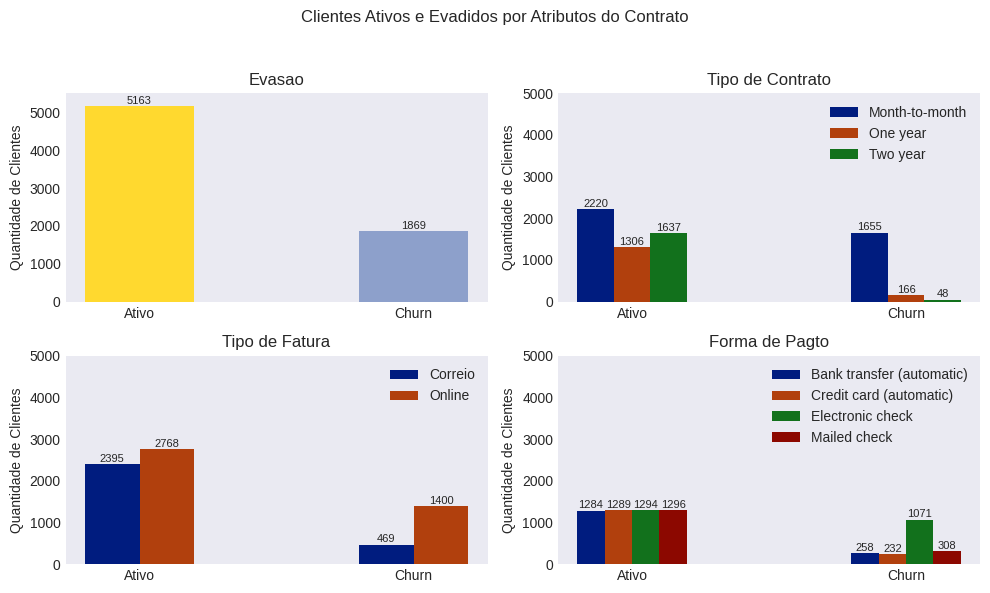

In [99]:
titulo = 'Clientes Ativos e Evadidos por Atributos do Contrato'
col_valores = 'Qde_Clientes'
col_pivot = ['','Tipo_Contrato','Fatura','Forma_Pagto']
col_grupos = 'Evasao'
titulos_axes = ['Evasao','Tipo de Contrato','Tipo de Fatura','Forma de Pagto']
legendas = ['Quantidade de Clientes','Quantidade de Clientes','Quantidade de Clientes','Quantidade de Clientes',
             '','','','']
lim_y = [ 5500, 5000, 5000, 5000]

df_graf= [pd.DataFrame() for _ in range(4)]

df_graf[0]  = ouro_Gasto_Contratos.groupby(col_grupos)[col_valores].sum().reset_index()
for i in range(1,4):
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='sum', fill_value=0).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y)

/tmp/ipython-input-100-4032448963.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='mean', fill_value=0).reset_index()
/tmp/ipython-input-100-4032448963.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='mean', fill_value=0).reset_index()


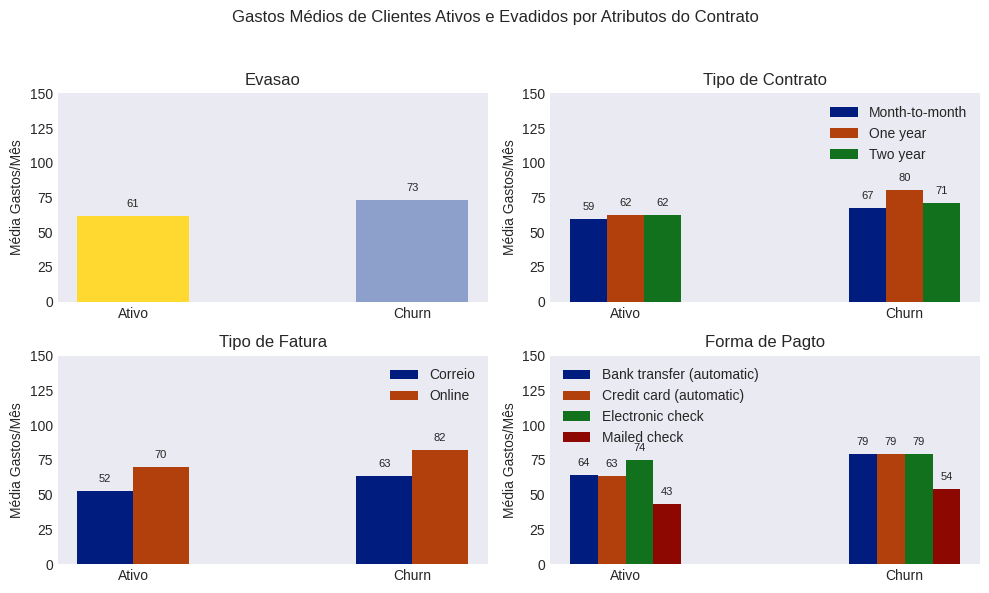

In [100]:
titulo = 'Gastos Médios de Clientes Ativos e Evadidos por Atributos do Contrato'
col_valores = 'Media_Gasto_Mes'
col_pivot = ['','Tipo_Contrato','Fatura','Forma_Pagto']
col_grupos = 'Evasao'
titulos_axes = ['Evasao','Tipo de Contrato','Tipo de Fatura','Forma de Pagto']
legendas = ['Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês',
             '','','','']
lim_y = [ 150, 150, 150, 150]

df_graf= [pd.DataFrame() for _ in range(4)]

df_graf[0]  = ouro_Gasto_Contratos.groupby(col_grupos)[col_valores].mean().reset_index()
for i in range(1,4):
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='mean', fill_value=0).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y)

In [103]:
query = """
  SELECT
   CASE WHEN Churn = 1 THEN 'Churn' WHEN Churn = 0 THEN 'Ativo' END as Evasao,
  count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio, sum(Churn) as Churn_Total,
  sum(Churn)*100.0/count(c.ID_Cliente) as Perc_Churn,
  Servico_Telefone, Servico_MultiplasLinhas, Internet_DSL, Internet_Fiber_optic as Internet_Fibra, Internet_No,
  Opt_OnlineSecurity as OnlineSecurity, Opt_OnlineBackup as OnlineBackup, Opt_DeviceProtection as DeviceProtection,
  Opt_TechSupport as TechSupport, Opt_StreamingTV as StreamingTV, Opt_StreamingMovies as StreamingMovies,
  Tipo_Contrato, FaturaOnline, Forma_Pagto,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_contratos as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  INNER JOIN fato_servicos_clientes as s ON c.ID_Cliente = s.ID_Cliente
  INNER JOIN dim_tipos_servicos as ts ON s.ID_Servicos = ts.ID_Servicos
  GROUP BY ALL
  ORDER by Qde_Clientes DESC
"""

ouro_Gasto_Servicos = db.sql(query).df()
ouro_Gasto_Servicos.to_parquet('data/ouro/DW_Gasto_Servicos.parquet')
ouro_Gasto_Servicos.head()

,Evasao,Qde_Clientes,Tempo_Contrato_Total,Tempo_Contrato_Medio,Churn_Total,Perc_Churn,Servico_Telefone,Servico_MultiplasLinhas,Internet_DSL,Internet_Fibra,...,StreamingMovies,Tipo_Contrato,FaturaOnline,Forma_Pagto,Gasto_Mensal,Gasto_Total,Gasto_Diarias,Media_Gasto_Dia,Media_Gasto_Mes,Media_Gasto_Total
0,Ativo,176,1400.0,7.954545,0.0,0.0,True,False,False,False,...,False,Month-to-month,0,Mailed check,3514.95,27873.70,117.165000,0.665710,19.971307,158.373295
1,Ativo,138,4835.0,35.036232,0.0,0.0,True,False,False,False,...,False,Two year,0,Mailed check,2753.95,97155.35,91.798333,0.665205,19.956159,704.024275
2,Ativo,115,2442.0,21.234783,0.0,0.0,True,False,False,False,...,False,One year,0,Mailed check,2293.20,48301.70,76.440000,0.664696,19.940870,420.014783
3,Ativo,91,4513.0,49.593407,0.0,0.0,True,False,False,False,...,False,Two year,0,Credit card (automatic),1810.10,90382.30,60.336667,0.663040,19.891209,993.212088
4,Churn,75,363.0,4.840000,75.0,100.0,True,False,False,True,...,False,Month-to-month,1,Electronic check,5245.70,25176.80,174.856667,2.331422,69.942667,335.690667


In [110]:
ouro_Gasto_Servicos.columns

Index(['Evasao', 'Qde_Clientes', 'Tempo_Contrato_Total',
       'Tempo_Contrato_Medio', 'Churn_Total', 'Perc_Churn', 'Servico_Telefone',
       'Servico_MultiplasLinhas', 'Internet_DSL', 'Internet_Fibra',
       'Internet_No', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tipo_Contrato',
       'FaturaOnline', 'Forma_Pagto', 'Gasto_Mensal', 'Gasto_Total',
       'Gasto_Diarias', 'Media_Gasto_Dia', 'Media_Gasto_Mes',
       'Media_Gasto_Total'],
      dtype='object')

In [134]:
df_graf[0]  = ouro_Gasto_Servicos.query('Servico_Telefone').groupby(['Evasao','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'])['Qde_Clientes'].sum().reset_index()
df_graf[0]

,Evasao,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Qde_Clientes
0,Ativo,False,False,False,False,False,False,1693
1,Ativo,False,False,False,False,False,True,60
2,Ativo,False,False,False,False,True,False,61
3,Ativo,False,False,False,False,True,True,76
4,Ativo,False,False,False,True,False,False,60
...,...,...,...,...,...,...,...,...
123,Churn,True,True,True,False,True,True,11
124,Churn,True,True,True,True,False,False,2
125,Churn,True,True,True,True,False,True,4
126,Churn,True,True,True,True,True,False,3


In [137]:
df_graf[0] = pd.pivot_table(data=ouro_Gasto_Servicos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='sum', fill_value=0).reset_index()
df_graf[0]

Internet_Fibra,Evasao,False,True
0,Ativo,3364,1799
1,Churn,572,1297


/tmp/ipython-input-96-933726112.py:40: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


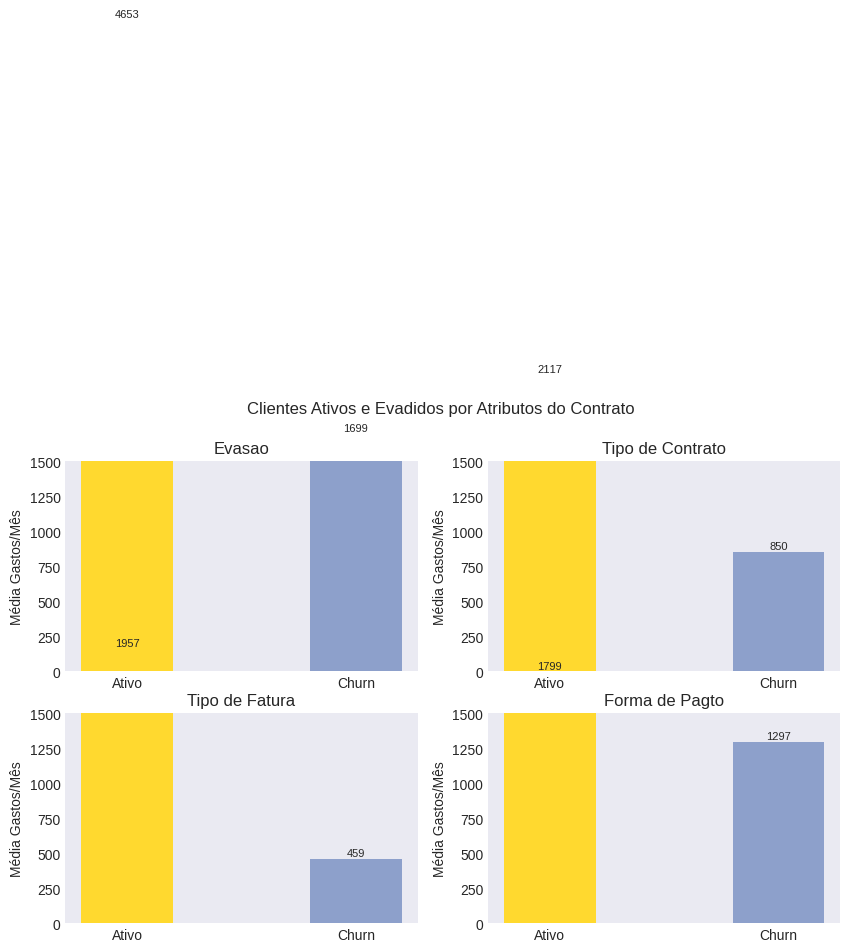

In [135]:
titulo = 'Clientes Ativos e Evadidos por Atributos do Contrato'
col_valores =  'Qde_Clientes'
col_grupos = ['Evasao','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
col_pivot = ['Servico_Telefone','Servico_MultiplasLinhas','Internet_DSL','Internet_Fibra']
col_grupos = 'Evasao'
titulos_axes = ['Evasao','Tipo de Contrato','Tipo de Fatura','Forma de Pagto']
legendas = ['Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês',
             '','','','']
lim_y = [ 1500, 1500, 1500, 1500]

df_graf= [pd.DataFrame() for _ in range(4)]

#df_graf[0]  = ouro_Gasto_Servicos.groupby(col_grupos)[col_valores].mean().reset_index()
for i in range(4):
  df_graf[i] = ouro_Gasto_Servicos.query(col_pivot[i]).groupby(col_grupos)[col_valores].sum().reset_index()

  # pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='mean', fill_value=0).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y)

KeyError: 'Servico_Telefone'

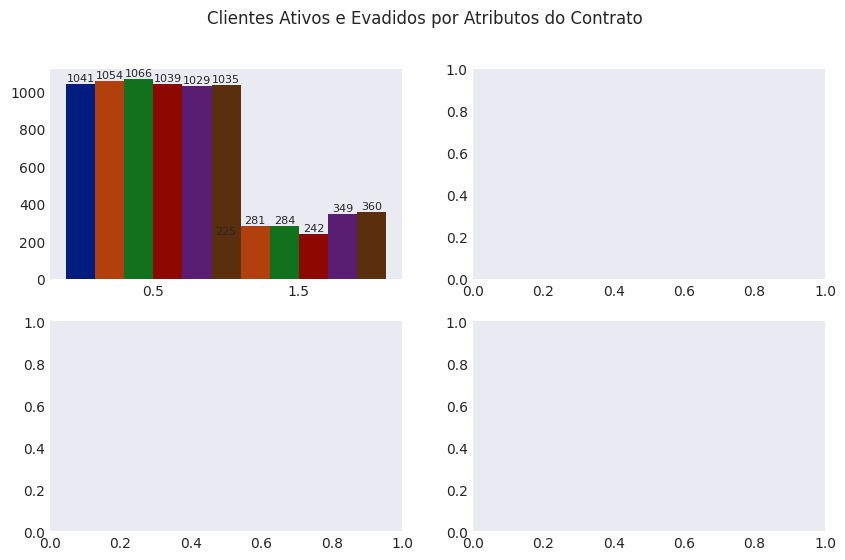

In [112]:
titulo = 'Clientes Ativos e Evadidos por Atributos do Contrato'
col_servicos = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
col_grupos = ['Servico_Telefone','Servico_MultiplasLinhas','Internet_DSL','Internet_Fibra']
#col_grupos = ['Evasao','Evasao','Evasao','Evasao']
titulos_ax = ['Evasao','Faixa Etária','Parceiros','Dependentes']
legendas = ['Contagem de Clientes','Contagem de Clientes','Contagem de Clientes','Contagem de Clientes',
             '','','','']
tamanho_barras = 0.2
df_1 = ouro_Gasto_Servicos.groupby('Evasao')[col_servicos].sum().reset_index()
df_2 = ouro_Gasto_Servicos.groupby('Evasao')[col_servicos].sum().reset_index()
df_3 = ouro_Gasto_Servicos.groupby('Evasao')[col_servicos].sum().reset_index()
df_4 = ouro_Gasto_Servicos.groupby('Evasao')[col_servicos].sum().reset_index()
graficos_atributos([df_1,df_2,df_3,df_4], col_servicos,col_grupos, titulos_ax, legendas, tamanho_barras, titulo, 1400)

In [104]:
titulo = 'Clientes Ativos e Evadidos por Atributos do Contrato'
col_valores = ['Qde_Clientes', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# [ 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
col_pivot = ['','Servico_Internet','Forma_Pagto','Forma_Pagto']
col_grupos = 'Evasao'
titulos_axes = ['Evasao','Tipo de Contrato','Tipo de Fatura','Forma de Pagto']
legendas = ['Quantidade de Clientes','Quantidade de Clientes','Quantidade de Clientes','Quantidade de Clientes',
             '','','','']
lim_y = [ 5000, 5000, 5000, 5000]

df_graf= [pd.DataFrame() for _ in range(4)]

df_graf[0]  = ouro_Gasto_Servicos.groupby(col_grupos)['Qde_Clientes'].sum().reset_index()
for i in range(1,4):
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Servicos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='sum', fill_value=0).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y)

KeyError: 'Servico_Internet'

In [ ]:
titulo = 'Gastos Médios de Clientes Ativos e Evadidos por Atributos do Contrato'
col_valores = 'Media_Gasto_Mes'
col_pivot = ['','Tipo_Contrato','Fatura','Forma_Pagto']
col_grupos = 'Evasao'
titulos_axes = ['Evasao','Tipo de Contrato','Tipo de Fatura','Forma de Pagto']
legendas = ['Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês','Média Gastos/Mês',
             '','','','']
lim_y = [ 150, 150, 150, 150]

df_graf= [pd.DataFrame() for _ in range(4)]

df_graf[0]  = ouro_Gasto_Contratos.groupby(col_grupos)[col_valores].mean().reset_index()
for i in range(1,4):
  df_graf[i] = pd.pivot_table(data=ouro_Gasto_Contratos, values=col_valores, index=col_grupos,columns= col_pivot[i], aggfunc='mean', fill_value=0).reset_index()

graficos_atributos2(df_graf, titulos_axes, legendas, titulo, lim_y)

### Análise de Churn e Gastos por atributos dos servicos

### Análise de Churn por atributos dos clientes






In [ ]:
query = """
  SELECT count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio, sum(Churn) as Churn_Total,
  sum(Churn)*100.0/count(c.ID_Cliente) as Perc_Churn,
  genero, idoso, casal, dependentes
  FROM dim_contratos as cont
  INNER JOIN dim_clientes as c ON cont.ID_Cliente = c.ID_Cliente
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY cont.Tipo_Contrato, cont.FaturaOnline, cont.Forma_Pagto,
     c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Churn_Total DESC

"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()
ouro_Churn_Cliente = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Churn_Cliente.to_parquet('data/ouro/DW_Churn_Cliente.parquet')
ouro_Churn_Cliente

### Análise de Evasão por atributos dos clientes






In [ ]:
query = """
  SELECT Churn as Evasao, count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio,
  genero, idoso, casal, dependentes
  FROM dim_contratos as cont
  INNER JOIN dim_clientes as c ON cont.ID_Cliente = c.ID_Cliente
  --INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY Churn,
  -- cont.Tipo_Contrato, cont.FaturaOnline, cont.Forma_Pagto,
     c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Qde_Clientes DESC
"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

ouro_Evasao_Cliente = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Evasao_Cliente.to_parquet('data/ouro/DW_Evasao_Cliente.parquet')
ouro_Evasao_Cliente

### Análise de Churn por atributos dos contratos

In [ ]:
query = """
  SELECT Churn as Evasao, count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio,
  -- genero, idoso, casal, dependentes
  Tipo_Contrato, FaturaOnline, Forma_Pagto,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_contratos as c
  -- INNER JOIN dim_clientes as c ON cont.ID_Cliente = c.ID_Cliente
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY Churn,
  c.Tipo_Contrato, c.FaturaOnline, c.Forma_Pagto
  --   c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Qde_Clientes DESC

"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

ouro_Evasao_Contrato = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Evasao_Contrato.to_parquet('data/ouro/DW_Evasao_Contrato.parquet')
ouro_Evasao_Contrato

In [ ]:
#colunas_traduzidas = ['ID_Cliente', 'Churn', 'Genero', 'Idoso', 'Casal', 'Dependentes', 'Tempo_Contrato', 'Servico_Telefone', 'Servico_MultiplasLinhas', 'Servico_Internet', 'Opt_OnlineSecurity',
#                      'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'Tipo_Contrato', 'FaturaOnline',
#                      'Forma_Pagto', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']

#📄Relatorio Final

In [ ]:
# Encerrar o DuckDB
db.close()